Note: you may need to restart the kernel to use updated packages.
wine Dataset:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82         

c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You

Best number of cluster for K-Means: 10


c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bhern\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

Best number of cluster for GMM: 1
USArrests with Clusters:
      rownames  Murder  Assault  UrbanPop  Rape  KMeans_Cluster  GMM_Cluster
0     Alabama    13.2      236        58  21.2               2            0
1      Alaska    10.0      263        48  44.5               8            0
2     Arizona     8.1      294        80  31.0               5            0
3    Arkansas     8.8      190        50  19.5               6            0
4  California     9.0      276        91  40.6               7            0


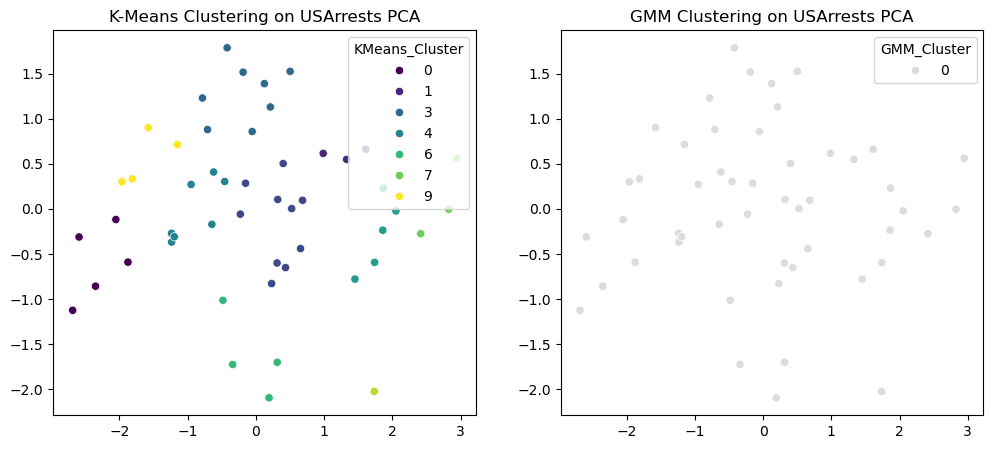

In [4]:
%pip install rdatasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_wine
from rdatasets import data

wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

chickwts = data('chickwts').dropna()
chickwts_df = pd.DataFrame(chickwts)

usarrests = data('USArrests').dropna()
usarrests_df = pd.DataFrame(usarrests)

print("wine Dataset:\n", wine_df.head(), "\n")
print("chickwts Dataset:\n", chickwts_df.head(), "\n")
print("USArrests Dataset:\n", usarrests_df.head(), "\n")

wine_df["target"] = wine_df["target"].astype('category')
X = wine_df.drop("target", axis=1)
y = wine_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
best_knn = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
print(f"Best k: {best_knn}, Best Metric: {best_metric}")

knn = KNeighborsClassifier(n_neighbors=best_knn, metric=best_metric)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"k-NN Accuracy: {accuracy:.2f}")

scaler = StandardScaler()
chickwts_scaled = scaler.fit_transform(chickwts[["weight"]])
pca = PCA(n_components=1)
chickwts_pca = pca.fit_transform(chickwts_scaled)

similarity_matrix = cosine_similarity(chickwts_pca)
print("Cosine Similarity Matrix:\n", similarity_matrix)

def recommended_feeds(feed_name, num_recommendations=3):
    # Get all rows with the specified feed type
    feed_indices = chickwts[chickwts['feed'] == feed_name].index
    
    if len(feed_indices) == 0:
        return []
    
    # Use the first occurrence of this feed type
    feed_index = feed_indices[0]
    feed_similarities = similarity_matrix[feed_index]
    
    # Get unique feed types for each row
    feed_types = chickwts['feed'].values
    
    # Calculate average similarity for each unique feed type
    unique_feeds = chickwts['feed'].unique()
    avg_similarities = {}
    
    for feed in unique_feeds:
        if feed != feed_name:
            feed_rows = chickwts[chickwts['feed'] == feed].index
            avg_sim = np.mean([feed_similarities[i] for i in feed_rows])
            avg_similarities[feed] = avg_sim
    
    # Sort by similarity and get top recommendations
    sorted_feeds = sorted(avg_similarities.items(), key=lambda x: x[1], reverse=True)
    recommended = [feed for feed, sim in sorted_feeds[:num_recommendations]]
    
    return recommended

usarrests_numeric = usarrests[['Murder', 'Assault', 'UrbanPop', 'Rape']]
scaler = StandardScaler()
usarrests_scaled = scaler.fit_transform(usarrests_numeric)
usarrests_selected = usarrests_scaled

selector = SelectKBest(score_func=f_classif, k=3)
usarrests_selected = selector.fit_transform(usarrests_scaled, usarrests_df.index)

pca = PCA(n_components=2)
usarrests_pca = pca.fit_transform(usarrests_selected)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(usarrests_pca)
    inertia.append(kmeans.inertia_)

best_k = inertia.index(min(inertia)) + 1
print(f"Best number of cluster for K-Means: {best_k}")
kmeans = KMeans(n_clusters=best_k, random_state=42)
usarrests_df['KMeans_Cluster'] = kmeans.fit_predict(usarrests_pca)
best_gmm_k = 1
lowest_bic = np.inf
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(usarrests_pca)
    bic = gmm.bic(usarrests_pca)
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm_k = k
print(f"Best number of cluster for GMM: {best_gmm_k}")
gmm = GaussianMixture(n_components=best_gmm_k, random_state=42)
usarrests_df['GMM_Cluster'] = gmm.fit_predict(usarrests_pca)
print("USArrests with Clusters:\n", usarrests_df.head())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=usarrests_pca[:, 0], y=usarrests_pca[:, 1], hue=usarrests_df['KMeans_Cluster'], palette='viridis')  
plt.title('K-Means Clustering on USArrests PCA')
plt.subplot(1, 2, 2)
sns.scatterplot(x=usarrests_pca[:, 0], y=usarrests_pca[:, 1], hue=usarrests_df['GMM_Cluster'], palette='coolwarm') 
plt.title('GMM Clustering on USArrests PCA')
plt.show()












                                    





